# Carregamento dados

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from gensim.models import Word2Vec

dados_reviews = pd.read_csv('dados_reviews_tratados.csv', sep=',')
dados_reviews['content'] = dados_reviews['content'].fillna('')
dados_reviews = dados_reviews[~dados_reviews['sentiment'].isin(['surprise', 'fear'])]

# Treinamento e teste Word2Vec

In [6]:
# Treinamento do modelo Word2Vec
sentences = [sentence.split() for sentence in dados_reviews['content']]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Função para obter a média dos vetores das palavras
def get_mean_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

# Aplicar a função para todas as reviews
X = np.array([get_mean_vector(sentence.split(), model) for sentence in dados_reviews['content']])
y = np.array(dados_reviews['sentiment'])

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo de classificação
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Previsão e avaliação
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Novo DataFrame com reviews para teste
teste_emocoes = pd.read_csv('teste.csv', sep=',', encoding='latin-1')

# Função de tokenização
def tokenize(text):
    return text.lower().split()

# Função para prever o sentimento de um review
def predict_sentiment(review):
    tokens = tokenize(review)
    review_vector = get_mean_vector(tokens, model)
    review_vector = review_vector.reshape(1, -1)  # Transformar em formato 2D
    return clf.predict(review_vector)[0]  # Retornar a previsão


              precision    recall  f1-score   support

       anger       0.37      0.29      0.33       147
     disgust       0.45      0.59      0.51       186
   happiness       0.45      0.21      0.28        68
     neutral       1.00      0.09      0.17        11
     sadness       0.47      0.52      0.49       180

    accuracy                           0.44       592
   macro avg       0.55      0.34      0.36       592
weighted avg       0.45      0.44      0.43       592



In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Previsão e avaliação
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       anger       0.37      0.29      0.33       147
     disgust       0.45      0.59      0.51       186
   happiness       0.45      0.21      0.28        68
     neutral       1.00      0.09      0.17        11
     sadness       0.47      0.52      0.49       180

    accuracy                           0.44       592
   macro avg       0.55      0.34      0.36       592
weighted avg       0.45      0.44      0.43       592



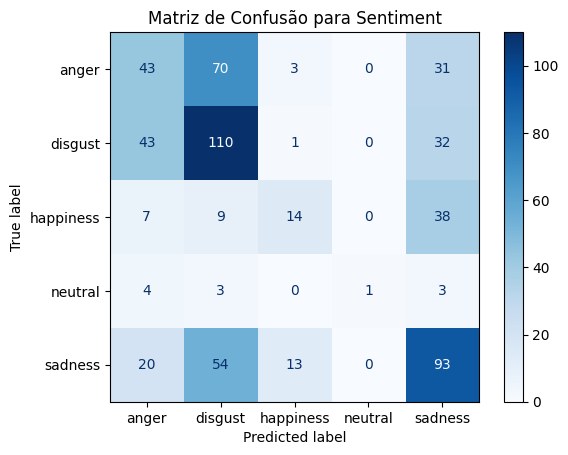

In [27]:
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

# Exibir a matriz de confusão usando ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')

# Exibir a matriz de confusão
plt.title("Matriz de Confusão para Sentiment")
plt.show()

# Teste com avalições da Google Play

In [18]:
teste_emocoes = pd.read_csv('teste_tratado.csv')

teste_emocoes['sentimento_previsto'] = teste_emocoes['content'].apply(predict_sentiment)

teste_emocoes[['app','sentiment', 'sentimento_previsto']]

,app,sentiment,sentimento_previsto
0,iFood,disgust,disgust
1,iFood,sadness,disgust
2,Nubank,happiness,sadness
3,Brave Mobile,happiness,disgust
4,Figurinhas do Lula - PT,anger,disgust
5,Shopee,sadness,sadness
6,Shopee,anger,disgust
7,Shopee,happiness,sadness
8,Shopee,happiness,happiness
